<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/10%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6. XGBoost(eXtra Gradient Boost)**

XGBoost의 장점
* 뛰어난 예측 성능: 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘
* GBM 대비 빠른 수행 시간: 일반적인 GBM은 순차적으로 Weak learner가 가중치를 증감하는 방법으로 학습하기 때문에 전반적으로 속도가 느리지만 XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장, 아쉽게도 XGBoost가 일반적인 GBM에 비해 수행 시간이 빠르다는 것이지, 다른 머신러닝 알고리즘(ex. 랜덤포레스트)에 비해서 빠르다는 의미는 아님
* 과적합 규제(Regularization): 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가질 수 있음
* Tree pruning(나무 가지치기): 일반적으로GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않지만, 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있음 다른 GBM과 마찬가지로 XGBoost도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점을 가지고 있음
* 자체 내장된 교차 검증: XGBoost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있음
* 결손값 자체 처리: XGBoost는 결손값을 자체 처리할 수 있는 기능 가지고 있음




XGBoost의 파이썬 패키지 = xgboost

→ 파이썬 래퍼 XGBoost 모듈 + 사이킷런 래퍼 XGBoost 모듈(XGBClassifier와 XGBRegressor)

→ 사이킷런 래퍼 XGBoost 모듈은 사이킷런의 다른 Estimator와 사용법 같지만, 파이썬 네이티브 XGBoost는 고유의 API와 하이퍼 파라미터 이용

XGBoost 설치하기

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

**파이썬 래퍼 XGBoost 하이퍼 파라미터**

파이썬 래퍼 XGBoost 하이퍼 파라미터 유형
* 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음
* 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭(대부분이 여기에 속함)
* 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

주요 일반 파라미터
* booster: gbtree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree
* silent: 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
*nthread: CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것, 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경

주요 부스터 파라미터
* eta[default=0.3, alias:learning_rate]: GBM의 학습률(learning rate)과 같은 파라미터, 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며 디폴트는 0.1, 보통은 0.01~0.2 사이의 값을 선호
* num_boost_rounds: GBM의 n_estimators와 같은 파라미터
* min_child_weight[default=1]: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합, min_child_weight이 클수록 분할을 자제함, 과적합을 조절하기 위해 사용됨
* gamma[default=0, alias:min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값, 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리함, 값이 클수록 과적합 감소 효과가 있음
* max_depth[default=6]: 트리 기반 알고리즘의 max_depth와 같음, 0을 지정하면 깊이에 제한이 없음, Max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값 적용
* sub_sample[default=1]: GBM의 subsample과 동일, 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정, sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용, 0에서 1 사이의 값이 가능하나 일반적으로 0.5~1 사이의 값 사용
* colsample_bytree[default=1]: GBM의 max_features와 유사, 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용됨, 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용
* lambda[default=1, alias:reg_lambda]: L2 Regularization 적용 값, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
* alpha[default=0, alias:reg_alpha]: L1 Regularization 적용 값, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
* scale_pos_weight[default=1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

학습 태스크 파라미터
* objective: 최솟값을 가져야 할 손실 함수를 정의, XGBoost는 많은 유형의 손실함수를 사용할 수 있음,주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐
* binary:logistic: 이진 분류일 때 적용
* multi:softmax: 다중 분류일 때 적용, 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함
* multi:softprob: multhi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환
* eval_metric: 검증에 사용되는 함수를 정의, 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error
  * rmse: Root Mean Square Error
  * mae: Mean Absolute Error
  * logloss: NEgative log-likelihood
  * error: BInary classification error rate(0.5 threshold)
  * merror: Multiclass classification error rate
  * mlogloss: Multiclass logloss
  * auc: Area under the curve

과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있음
* eta 값을 낮춘다(0.01~0.1) eta 값을 낮출 경우num_round(또는 n_estimators)는 반대로 높여줘야 한다
* max_depth 값을 낮춘다
* min_child_weight 값을 높인다
* gamma 값을 높인다
* 또한 subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있다


In [2]:
import xgboost
print(xgboost.__version__)

1.7.5


**파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

위스콘신 유방암 데이터 세트: 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트

종양 - 양성 종양과 악성 종양으로 구분. (양성 종양이 비교적 성장 속도 느리고 전이되지 않아)

→ 위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성종양인지 일반 양성종양인지를 XGBoost를 이용해 예측

xgboost 패키지는 피처의 중요도 시각화해주는 모듈인 plot_importance 함께 제공

사이킷런에서 위스콘신 유방암 데이터 세트 load_breast_cancer()로 호출

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


→ 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 되어 있음

→ 타깃 레이블 값의 종류는 악성인 'malignant'가 0 값으로, 양성인 'benign'이 1 값으로 되어 있음

In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())
# 1 값인 양성 benign이 357개, 0 값인 악성 malignant가 212개로 구성

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [5]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost는 사이킷런과 다르게 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성함
* DMatrix: 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

In [6]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [7]:
params = { 'max_depth': 3,  # max_depth(트리 최대 깊이)는 3
           'eta': 0.1,  # 학습률 eta는 0.1(XGBClassifier 사용할 경우 learning_rate)
           'objective': 'binary:logistic',  # 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binary:logistic)
           'eval_metric': 'logloss',  # 오류 함수의 평가 성능 지표는 logloss
           'early_stoppings': 100
         }
num_rounds = 400  # num_rounds(부스팅 반복 횟수)는 400회

* 학습 시 XGBoost는 수행 속도를 개선하기 위해서 조기 중단 기능 제공
* 조기 중단은 XGBoost가 수행 성능을 개선하기 위해서 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것
* 조기 중단은 xgboost의 train() 함수에 early_stopping_rounds 파라미터를 입력하여 설정
* early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 eval_set과 eval_metric이 함께 설정돼야 함, XGBoost는 반복마다 eval_et으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류 측정
  * eval_set는 성능 평가를 수행할 평가용 데이터 세트를 설정
  * eval_metric은 평가 세트에 적용할 성능 평가 방법, 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용

In [8]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기함
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, \
                      early_stopping_rounds=100, evals=wlist)

[13:22:33] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	

train()으로 학습시 train-error, eval-logloss가 지속적으로 감소

테스트 데이터 세트에 예측 수행

*유의할 점: 사이킷런의 predict() 메서드는 예측 결과 클래스 값(0, 1)을 반환하는 데 반해 xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환함

→ 본 예제는 암이 악성인지, 양성인지를 판단하는 이진 분류이므로 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직 추가하면 됨

In [9]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [12]:
# 예측 성능 평가
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

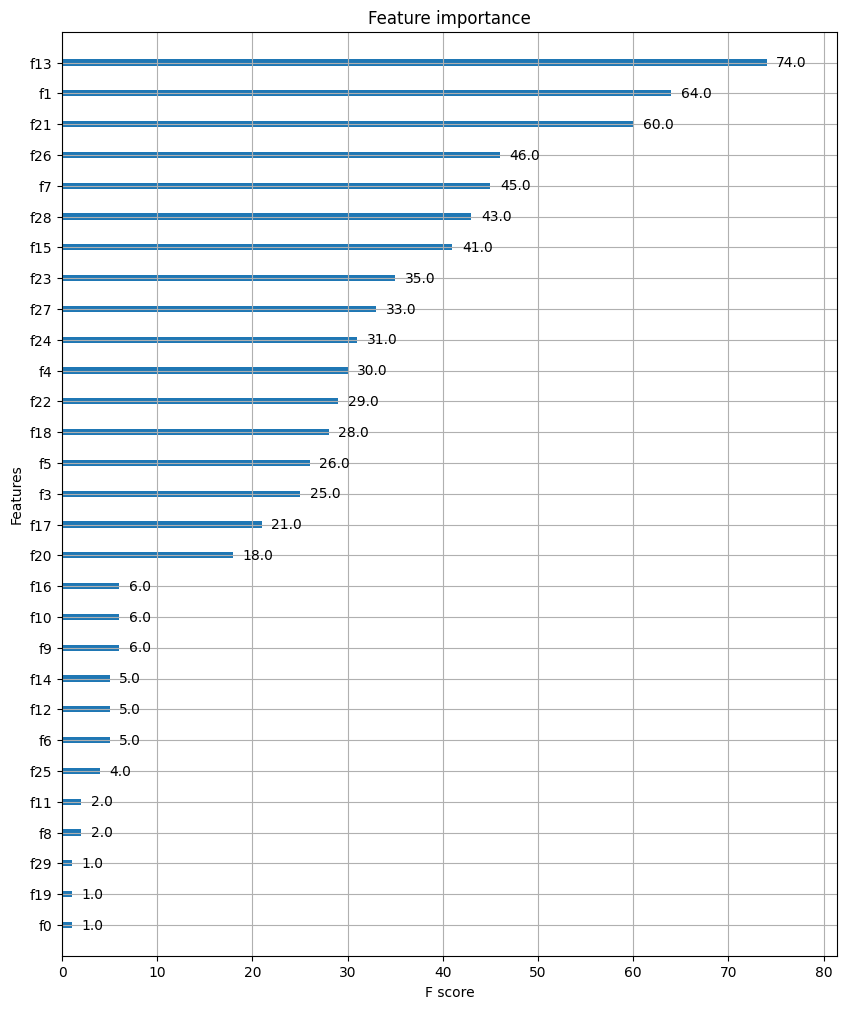

In [13]:
# f1 score 기반 각 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

* 결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 to_graphviz() API 이용해 시각화 가능
  + 파라미터로 학습이 완료된 모델 객체와 Graphviz가 참조할 파일명 입력
* 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공(반환값은 DataFrame 형태)


```
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), 
obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, 
verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
```
* 파라미터
  + params (dict): 부스터 파라미터
  + dtrain (DMatrix): 학습 데이터
  + num_boost_round (int): 부스팅 반복 횟수
  + nfold (int): CV 폴드 개수
  + stratified (bool): CV 수행 시 층화 표본 추출 수행 여부
  + metrics (string or list of strings): CV 수행 시 모니터링할 서능 평가 지표
  + early_stopping_rounds (int): 조기 중단을 활성화시킴. 반복 횟수 지정

**사이킷런 래퍼 XGBoost의 개요 및 적용**

파라미터 변경
* eta → learning_rate
* sub_sample → subsample
* lambda → reg_lambda
* alpha → reg_alpha


In [14]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9951


→ 앞 예제의 파이썬 래퍼 XGBoost와 동일한 평가 결과

In [15]:
from xgboost import XGBClassifier

xgb_wrapper =XGBClassifier(n_estimator=100, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
          

[13:22:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27

In [16]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9947


In [17]:
# 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼
# early_stopping_rouds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[13:22:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

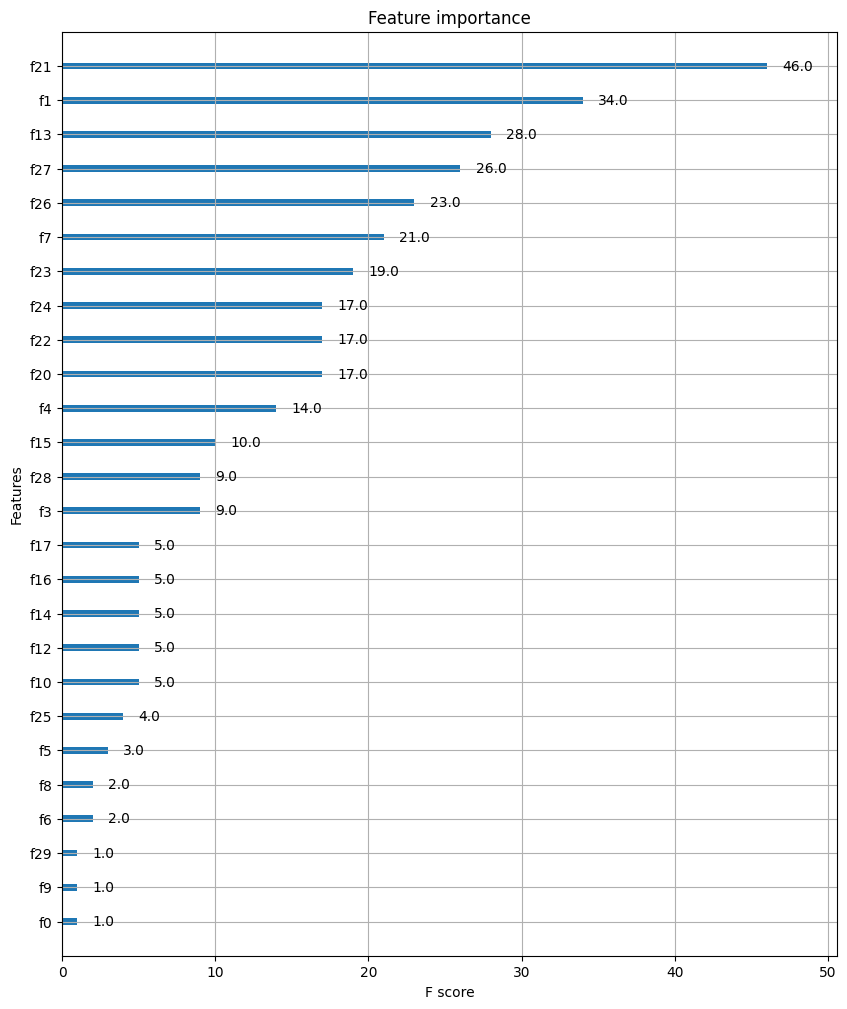

In [18]:
# 피처 중요도 시각화 모듈인 plot_importance()에 사이킷런 래퍼 클래스를 입력해도 앞의 결과와 똑같이 시각화 결과 도출
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10, 12))
# 사이킷런  wrapper클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)

**7. LightGBM**
* XGBoost보다 학습에 걸리는 시간 훨씬 적음, 예측 성능 차이는 안 남
* 적은 데이터 세트트에 적용할 경우 과적합 발생하기 쉬움(10000건 이하)
* 일반 GBM 계열의 트리 분할 방법과 다르게, 리프 중심 트리 분할(Leaf Wise) 방식 사용
  * 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨
  * 하지만 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 구현 사상


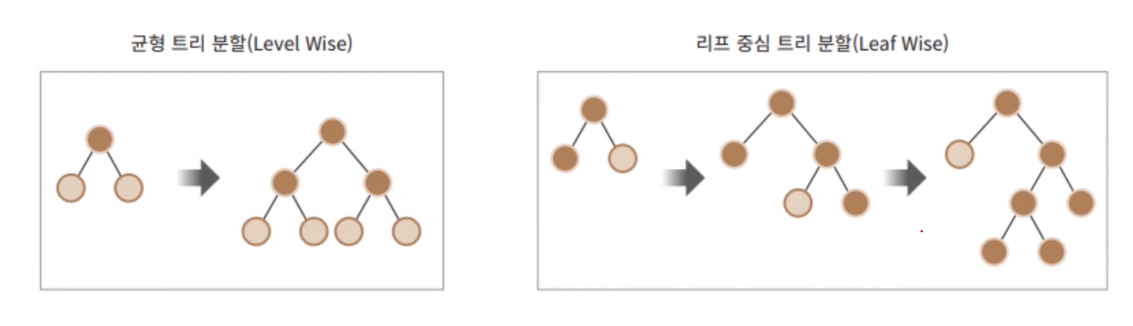

LightGBM의 XGBoost 대비 장점
* 더 빠른 학습과 예측 수행 시간
* 더 작은 메모리 사용량
* 카테고리형 피처의 자동 변화노가 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 ㅗㄴ드 분할 수행)

**LightGBM 하이퍼 파라미터**

주요 파라미터
* num_iterations[default=100]: 반복 수행하려는 트리의 개수 지정, 크게 지정할수록 예측 성능 높아질 수 있으나 너무 크게 지정하면 오히려 과적합으로 성능 저하될 수 있음, 사이킷런 GBM과 XGBoost의 사이킷런 호환 클래스의 n_estimators와 같은 파라미터이므로 LightGBM의 사이킷런 호환 클래스에서는 n_estimators로 이름 변경됨
* learning_rate[default=0.1]: 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 마찬가지로 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려해야 함, GBM, XGBoost의 learning_rate와 같은 파라미터
* max_depth[default=-1]: 트리 기반 알고리즘의 max_depth와 같음, 0보다 작은 값을 지정하면 깊이에 제한이 없음, 지금까지 소개한 Depth wise 방식의 트리와 다르게 LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊음
* min_data_in_leaf[default=20]: 결정 트리의 min_samples_leaf와 같은 파라미터, 하지만 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 min_child_samples 파라미터로 이름 변경됨, 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터임
* num_leaves[default=31]: 하나의 트리가 가질 수 있는 최대 리프 개수
* boosting[default=gbdt]: 부스팅의 트리를 생성하는 알고리즘을 기술
  * gbdt: 일반적인 그래디언트 부스팅 결정 트리
  * rf: 랜덤 포레스트
* bagging_fraction[default=1.0]: 트리가 커져서 과적하보디는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정, 사이킷런의 GBM과 XGBVlassifier의 subsample 파라미터와 동일하기에 사이킷런 래퍼 LightGBM인 LightGBMClassifier에서는 subsample로 동일하게 파라미터 이름이 변경됨

* feature_fraction[default=1.0]: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율, 과적합을 막기 위해 사용됨, GBM의 max_features와 유사하며, XGBClassifier의 colsample_bytree와 똑같으므로 LightGBMClassifier에서는 동일하게 colsample_bytree로 변경됨
* lambda_l2[default=0.0]: L2 regulation 제어를 위한 값, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음, XGBClassifier의 reg_lambda와 동일하므로 LightGBMClassifier에서는 reg_lambda로 변경됨
* lambda_l1[default=0.0]: L1 regulation 제어를 위한 값, L2와 마찬가지로 과적합 제어를 위한 것이며, XGBClassifier의 reg_alpha와 동일하므로 LightGBMClassifier에서는 reg_alpha로 변경됨


Learning Task 파라미터
* objective: 최솟값을 가져야 할 손실함수를 정의함, Xgboost의 objective 파라미터와 동일, 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 objective인 손실함수가 지정됨


하이퍼 파라미터 튜닝 방안
* num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM 모델의 복잡도를 제어하는 주요 파라미터임, 일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐
* min_data_in_leaf는 사이킷런 래퍼 클래스에서는 min_child_samples로 이름이 바뀜, 과적합을 개선하기 위한 중요한 파라미터, num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지함
* max_depth는 명시적으로 깊이의 크기를 제한함, num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용됨
* learning_rate을 작게 하면서 n_estimators를 크기 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이므로 이를 적용하는 것도 좋음 (n_estimators를 너무 크게 하는 것은 과적합이므로 오히려 성능이 저하될 수 있음을 유념해야 함)
* 과적합을 제어하기 위해서 reg_lambda, reg_alpha와 같은 regularization을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용할 수 있음

**파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoos, LightGBM 하이퍼 파라미터 비교**

|유형|파이썬 래퍼 LightGBM|사이킷런 래퍼 LightGBM|사이킷런 래퍼 XGBoost|
|:---|:---|:---|:---|
||num_iterations|n_estimators|n_estimators|
||learning_rate|learning_rate|learning_rate|
||max_depth|max_depth|max_depth|
||min_data_in_leaf|min_child_samples|N/A|
||bagging_fraction|subsample|subsample|
|파라미터명|feature_fraction|colsample_bytree|colsample_bytree|
||lambda_l2|reg_lambda|reg_lambda|
||lambda_l1|reg_alpha|reg_alpha|
||early_stoppping_round|early_stopping_rounds|early_stopping_rounds|
||num_leaves|num_leaves|N/A|
||min_sum_hessian_in_leaf|min_child_weight|min_child_weight|



LightGBM 적용 - 위스콘신 유방암 예측

In [19]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGMB도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [20]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870, F1: 0.9682, AUC: 0.9905


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

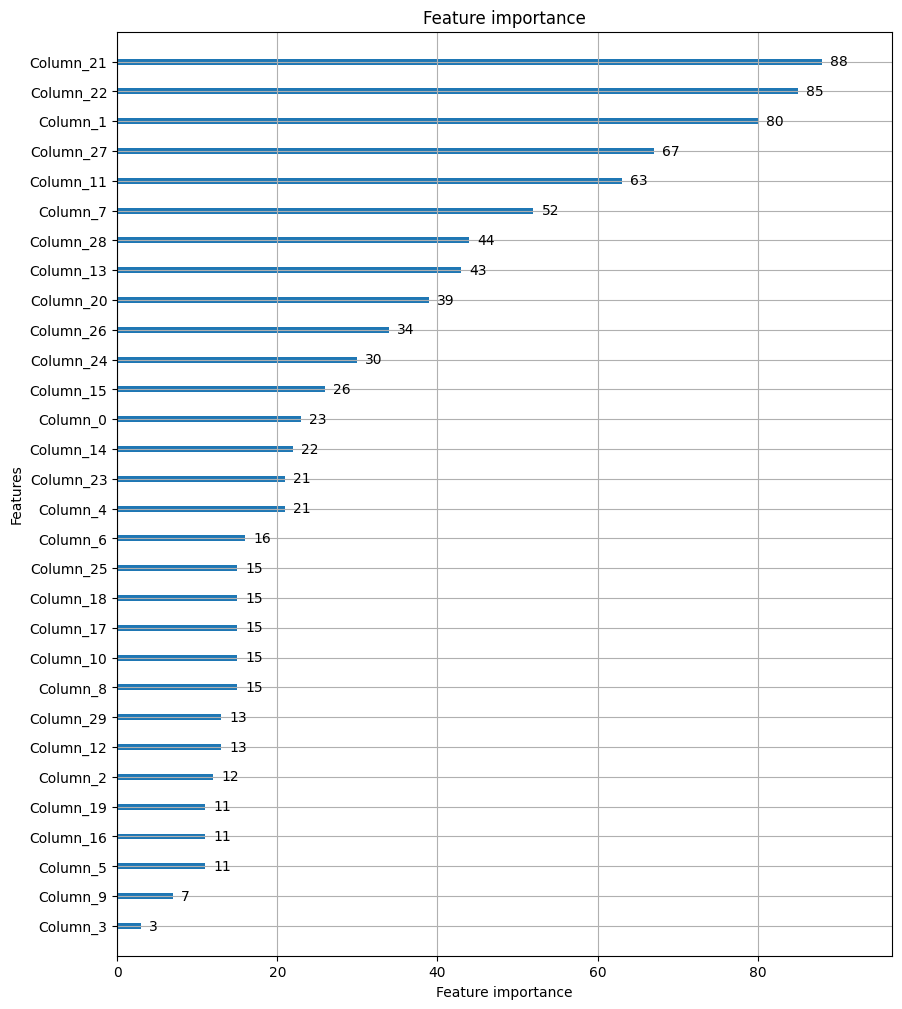

In [21]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

**10. 스태킹 앙상블**

* 스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅(Bagging) 및 부스팅(Boosting)과 공통점을 가지고 있지만, 스태킹은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 차이가 있음
* 즉, 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식
* 스태킹 모델은 두 종류의 모델 필요
  1. 개별적인 기반 모델
  2. 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델
* 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것
* 스태킹은 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상을 도출하기 위해 적용됨

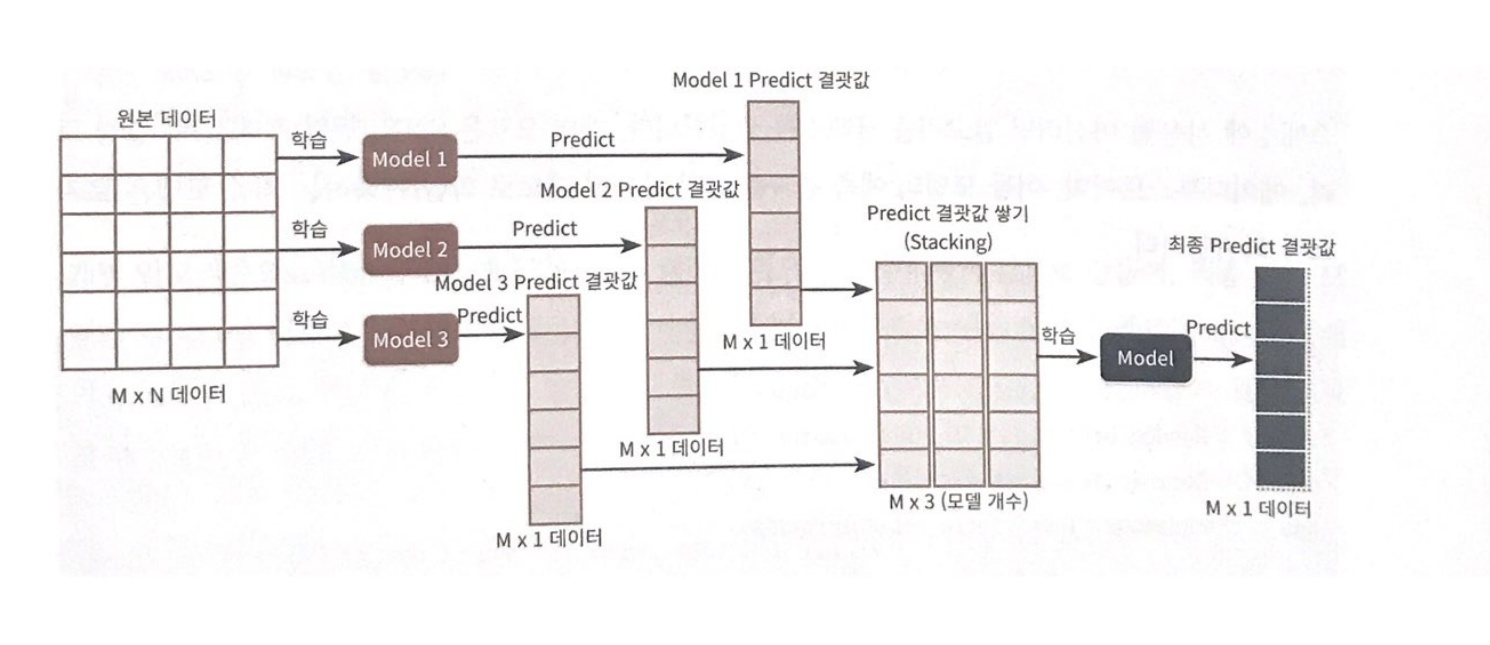

**기본 스태킹 모델**


In [22]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [23]:
# 개별 ML 모델을 위한 Classifier 생성
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성
lr_final = LogisticRegression()

In [24]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [25]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [26]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [27]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


**CV 세트 기반의 스태킹**

* CV 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용함
* 앞 예제에서 마지막에 메타 모델인 로지스틱 회귀 모델 기반에서 최종 학습할 때 레이블 데이터 세트로 학습 데이터가 아닌 테승트용 레이블 데이터 세트를 기반으로 학습했기에 과적합 문제가 발생할 수 있음
* CV 세트 기반의 스태킹은 이에 대한 개선을 위해 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행함, 이는 다음과 같이 2단계의 스텝으로 구분
  * 스텝 1: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성
  * 스텝 2: 스텝 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성, 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 테스트 데이터 세트를 생성, 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가함
  * 핵심은 개별 모델에서 메타 모델인 2차 모델에서 사용될 학습용 데이터와 테스트용 데이터를 교차 검증을 통해서 생성하는 것, 스텝 1은 개별 모델 레벨에서 수행하는 것이며, 이러한 로직을 여러 개의 개별 모델에서 동일하게 수행함
    + 먼저 학습용 데이터를 N개의 폴드(Fold)로 나눔(3개의 폴드세트로 가정: 3번의 유사한 반복 작업을 수행하고, 마지막 3번째 반복에서 개별 모델의 예측값으로 학습 데이터와 테스트 데이터 생성)
    + 주요 프로세스:
      1. 학습용 데이터를 3개의 폴드로 나누되, 2개의 폴드는 학습을 위한 데이터 폴드로, 나머지 1개의 폴드는 검증을 위한 데이터 폴드로 나눔, 이렇게 두 개의 폴드로 나뉜 학습 데이터를 기반으로 개별 모델을 학습시킴
      2. 이렇게 학습된 개별 모델은 검증 폴드 1개 데이터로 예측하고 그 결과를 저장, 이러한 로직을 3번 반복하면서 학습 데이터와 검증 데이터 세트를 변경해가면서 학습 후 예측 결과를 별도로 저장, 이렇게 만들어진 예측 데이터는 메타 모델을 학습시키는 학습 데이터로 사용됨
      3. 2개의 학습 폴드 데이터로 학습된 개별 모델은 원본 테스트 데이터를 예측하여 예측값을 생성함, 마찬가지로 이러한 로직을 3번 반복하면서 이 예측값의 평균으로 최종 결괏값을 생성하고 이를 메타 모델을 위한 테스트 데이터로 사용함


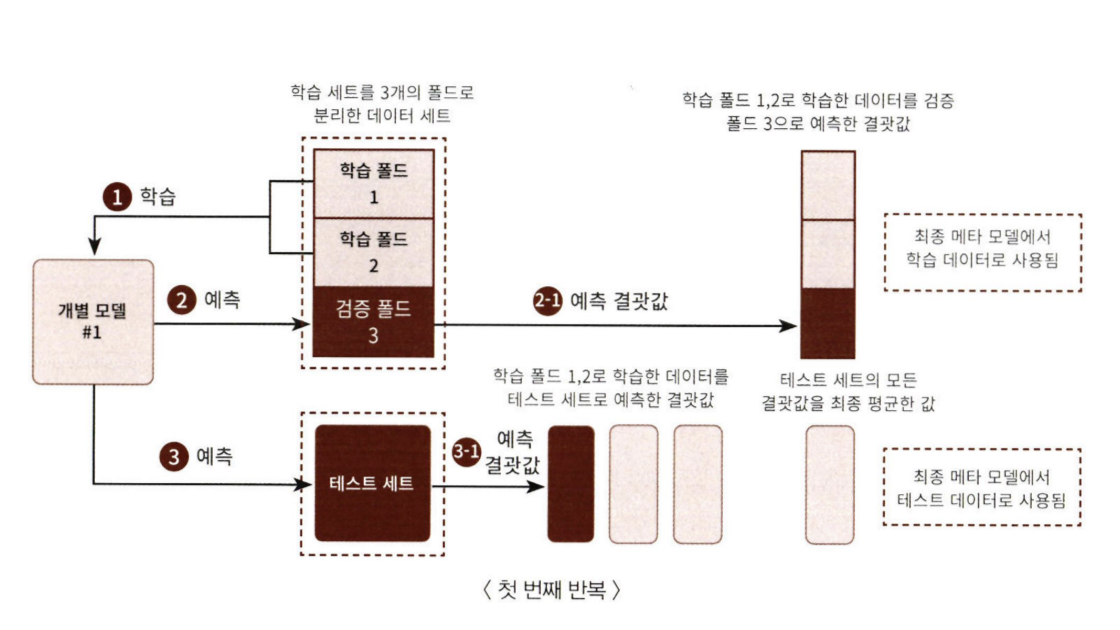

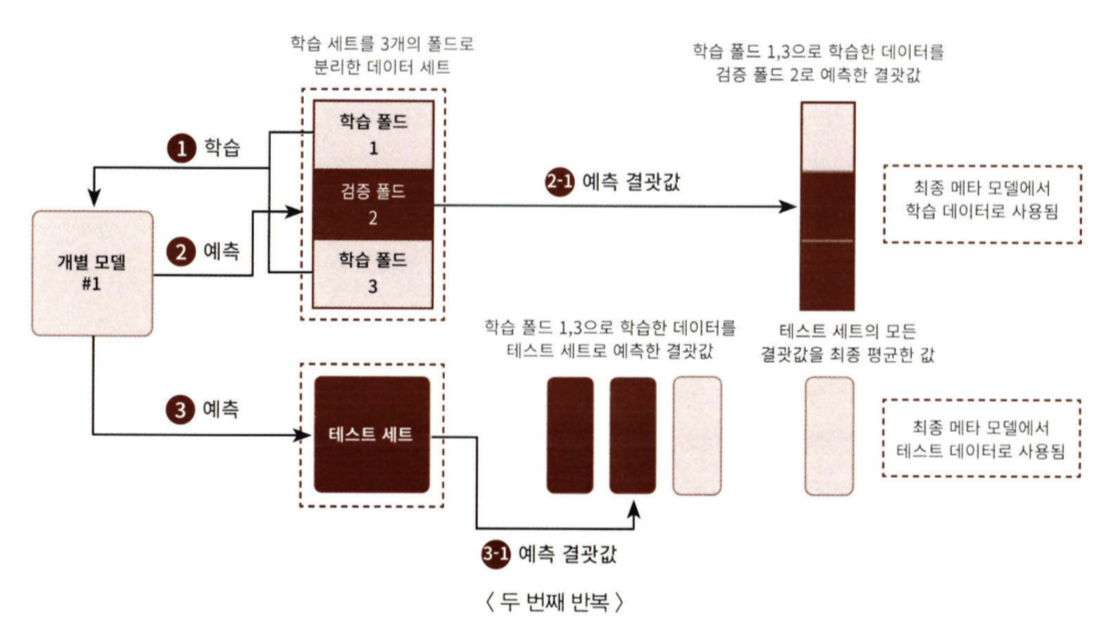

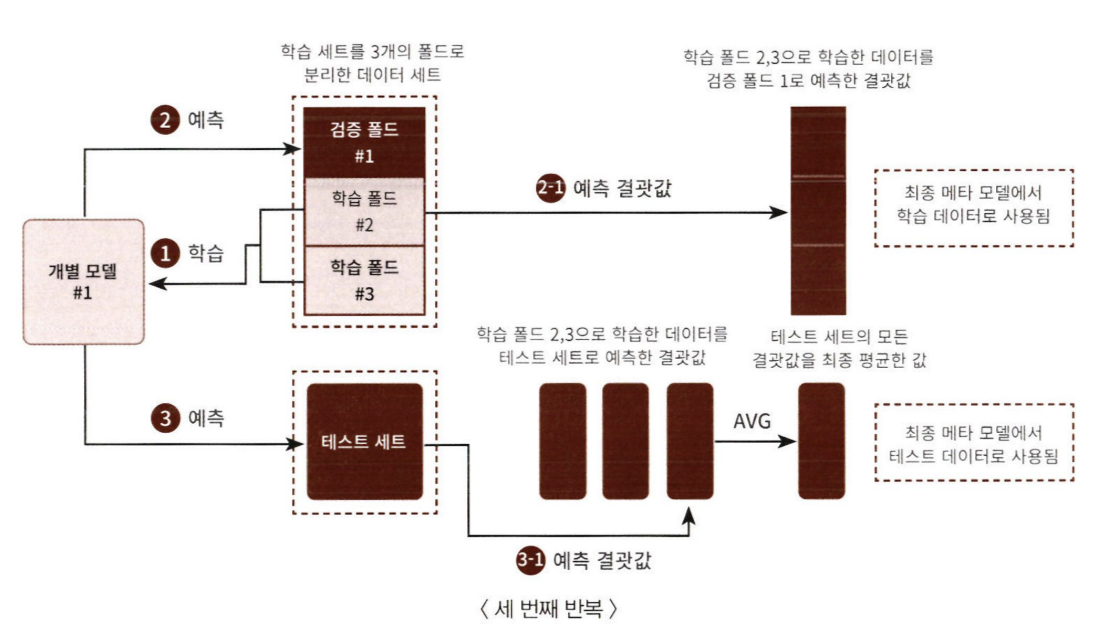

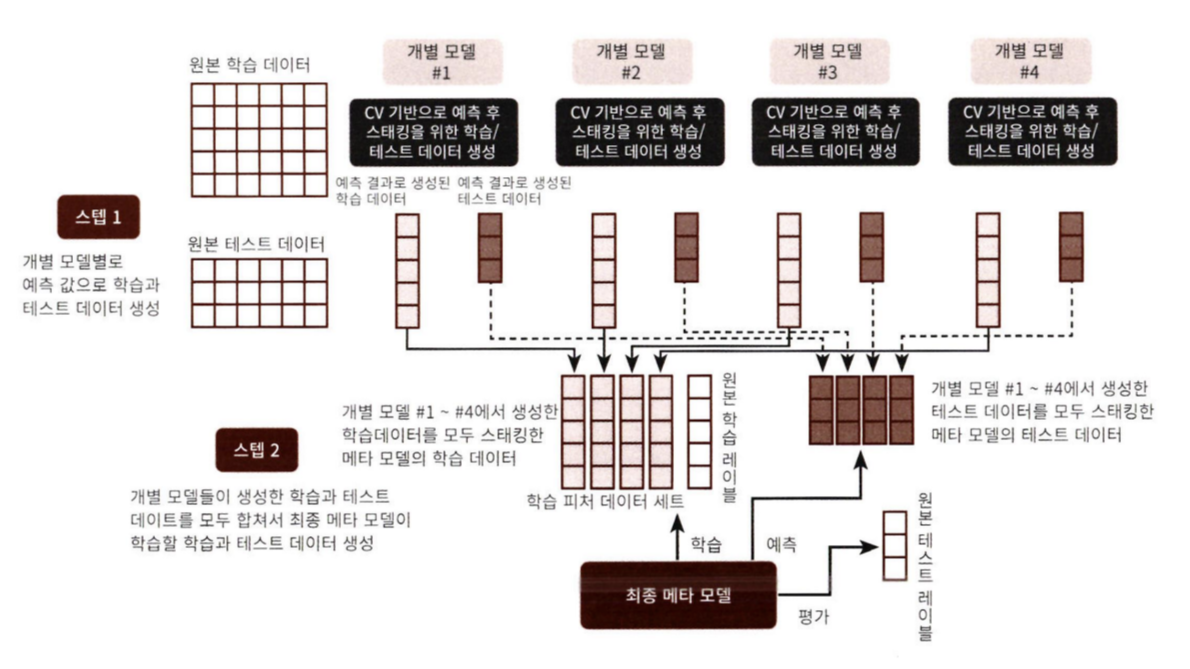

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [29]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [30]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [31]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
